In [1]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
import scipy.io as sio

from ipywidgets import FloatSlider, Button
import ipywidgets as widgets
from IPython.display import HTML, display

# Signal Processing Tutorial

### 1. Continuous vs. Discrete Signals

A computer cannot recognize continuous functions as we do. It can only store a finite set of values. Thus, we have to 'sample' continuous time signals $x(t)$ to perform any sort of computation (on a computer) with them.

For example, our notion of the function $x(t) = sin(\omega t + \theta)$ is captured by the following plot: 

<IPython.core.display.Javascript object>


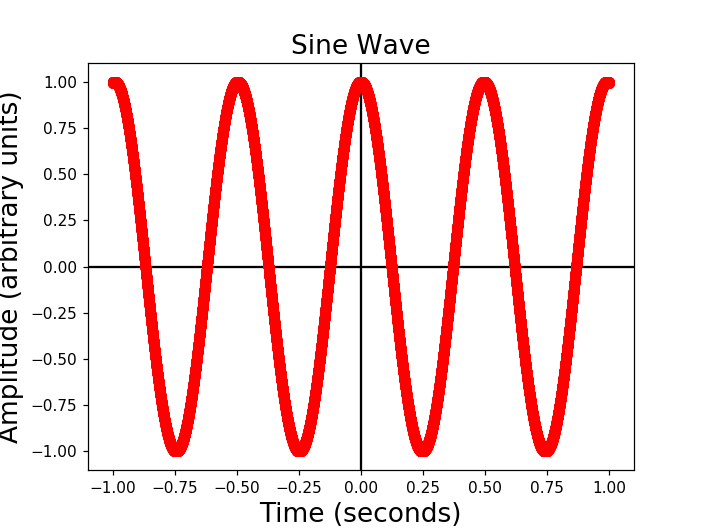

In [2]:
def sin(t, omega, theta):
    '''
        This function returns a sampled version of the sinusoid function.
        The sampling is controlled by the time parameter t.
        The frequency is specified by omega.
        The phase shift is specified by theta.
    '''
    return np.sin(omega * t + theta)

## Define plot parameters
t = np.arange(-1, 1, 0.0001)
omega = 2 * np.pi * 3
theta = np.pi / 2.0

## Create figure and axis objects so that the plot can be updated later.
sine = plt.figure()
ax = sine.add_subplot(111)
ax.axhline(y=0, color = 'k')
ax.axvline(x=0, color = 'k')
sinePlot, = ax.plot(t, sin(t, omega, theta), 'ro')

ax.set_title(label='Sine Wave', fontsize='xx-large')
ax.set_ylabel('Amplitude (arbitrary units)', fontsize='xx-large')
ax.set_xlabel('Time (seconds)', fontsize='xx-large')

## Add a slider and update plot everytime it moves.
omegaSlider = FloatSlider(min=0, max=10, step=0.005, continuous_update=True)
omegaSlider.value = omega/(2 * np.pi)
thetaSlider = FloatSlider(min=0, max=2 * np.pi, step=0.005, continuous_update=True)
thetaSlider.value = theta

def update_sine(omega, theta):
    global t
    sinePlot.set_ydata(sin(t, 2 * np.pi * omega, theta))
    sine.canvas.draw_idle()

def display_gui_sine():
    '''
        This function handles showing the widgets on the notebook
    '''
    widgets.interact(update_sine, omega=omegaSlider, theta=thetaSlider)

plt.show()

In [3]:
display_gui_sine()

interactive(children=(FloatSlider(value=3.0, description='omega', max=10.0, step=0.005), FloatSlider(value=1.5…

If you zoom into the plot using the 'Zoom to rectangle' button above, you will notice that there are gaps between two red dots (If you don't see this happen, you are not zooming in enough!!). In fact, the coordinates of the red dots are precisely the values stored by the computer to represent the signal above. This is happening implicitly when you set the 't' parameter above.

The parameter 't' is an array of real numbers containing values between -1 and 1 with steps of size 0.001. This step size 0.001 is known as the __sampling interval__. It is important to keep track of this value because it decides whether we can reconstruct the continuous time signal back from its sampled values.

Let's see how to keep track of the sampling variable mathematically. Let's suppose we have a continuous time function $x(t)$. We want to sample this function at intervals of $T$ seconds. We can define a sequence $x[n]$ as follows: $x[n] = x(nT),\ n \in \mathbb{Z}$. This means we are setting the $n^{th}$ sample of the sequence $x[n]$ to the value at (continuous) time $nT$ seconds. The following plot illustrates this idea:

<IPython.core.display.Javascript object>


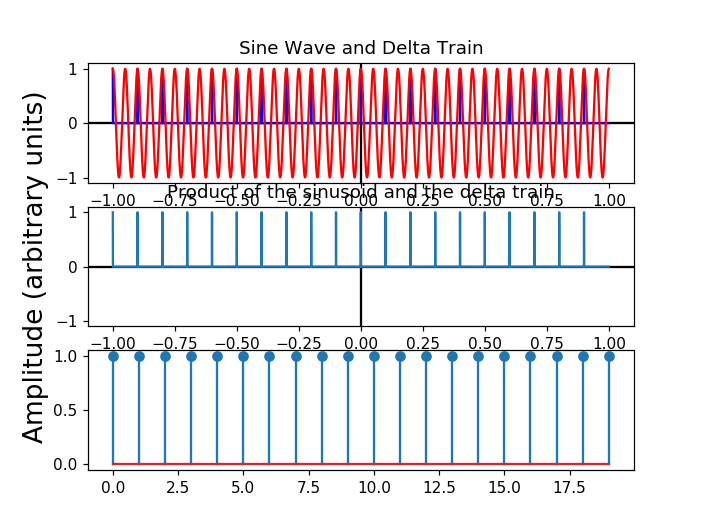

In [5]:
def get_delta_train(multiplicative_factor, signal_size):
    delta_train = np.zeros((signal_size,))
    sample_idx = np.arange(0, signal_size, 1)
    delta_train[sample_idx % multiplicative_factor == 0] = 1
    
    return delta_train

def get_sequence_from_signal(sinusoid, multiplicative_factor):
    signal_size = sinusoid.size
    sample_idx = np.arange(0, signal_size, 1)
    sequence = sinusoid[sample_idx % multiplicative_factor == 0]
    return sequence

## Define plot parameters
sampling_interval = 0.0001 #seconds
multiplicative_factor = 1000

t = np.arange(-1, 1, sampling_interval)
omega = 2 * np.pi * 3
theta = np.pi / 2.0

T = sampling_interval * multiplicative_factor

sinusoid = sin(t, omega, theta)
delta_train = get_delta_train(multiplicative_factor, t.size)
sequence = get_sequence_from_signal(sinusoid, multiplicative_factor)

## Create figure and axis objects so that the plot can be updated later.
sample = plt.figure()
ax1 = sample.add_subplot(311)
ax1.axhline(y=0, color = 'k')
ax1.axvline(x=0, color = 'k')
deltaPlot, = ax1.plot(t, delta_train, 'b')
samplePlot, = ax1.plot(t, sinusoid, 'r')

ax1.set_title(label='Sine Wave and Delta Train', fontsize='large')
ax1.set_xlabel('Time (seconds)', fontsize='large')

ax2 = sample.add_subplot(312)
ax2.axhline(y=0, color = 'k')
ax2.axvline(x=0, color = 'k')
sigSeqPlot, = ax2.plot(t, sinusoid * delta_train)
ax2.set_title(label='Product of the sinusoid and the delta train', fontsize='large')
ax2.set_ylabel('Amplitude (arbitrary units)', fontsize='xx-large')

ax3 = sample.add_subplot(313)
ax3.stem(np.arange(sequence.size), sequence)
ax3.set_title(label='The Sampled Sequence', fontsize='large')
ax3.set_xlabel('Sample Number', fontsize='large')

## Add a slider and update plot everytime it moves.
omegaSliderSample = FloatSlider(min=0, max=20, step=0.005, continuous_update=True)
omegaSliderSample.value = omega/(2*np.pi)
thetaSliderSample = FloatSlider(min=0, max=2 * np.pi, step=0.005, continuous_update=True)
thetaSliderSample.value = theta
intervalSliderSample = FloatSlider(min=200, max=5000, step=5, continuous_update=True)
intervalSliderSample.value = 1000

def update_sample(omega, theta, multiplicative_factor):
    global t, sampling_interval
    
    sinusoid = sin(t, 2 * np.pi * omega, theta)
    delta_train = get_delta_train(multiplicative_factor, t.size)
    sequence = get_sequence_from_signal(sinusoid, multiplicative_factor)
    
    samplePlot.set_ydata(sinusoid)
    deltaPlot.set_ydata(delta_train)
    sigSeqPlot.set_ydata(sinusoid * delta_train)
    ax3.cla()
    ax3.stem(np.arange(sequence.size), sequence)
    
    sample.canvas.draw_idle()
    T = sampling_interval * multiplicative_factor
    print("Sampling Frequency: ", str(T), " seconds")
    print("Sampling Frequency: ", str(1./T), " Hz")
    print("Number of Samples: ", str(sequence.size))

def display_gui_sample():
    '''
        This function handles showing the widgets on the notebook
    '''
    widgets.interact(update_sample, omega=omegaSliderSample, theta=thetaSliderSample, multiplicative_factor=intervalSliderSample)

plt.show()

In [6]:
display_gui_sample()

interactive(children=(FloatSlider(value=3.0, description='omega', max=20.0, step=0.005), FloatSlider(value=1.5…

In the above plot, the sampling interval is given by: $T = 0.0001 \times$ multiplicative_factor seconds. Play with the multiplicative factor for any frequency value of your choice. (Hint: Try omega = $2.5$ Hz, multiplicative_factor = $5000$, theta = $0$ radians). At what point do you think it will be impossible for you to reconstruct the signal back from its samples?

The Shannon-Nyquist sampling theorem tells us that as long as the sampling frequency is greater than or equal to twice the maximum frequency content (in this case controlled by the omega slider!), it is possible to reconstruct the original continuous time signal. Can you explain why by playing with the sliders above?

### 2. The Frequency Domain

Let's now look at the __Fourier Transform__ of signals. Let's suppose we wish to study the frequency content of a continuous time signal. The Fourier Transform of a signal will tell us exactly what frequencies are present in the signal. Take a look at the following plot:

<IPython.core.display.Javascript object>


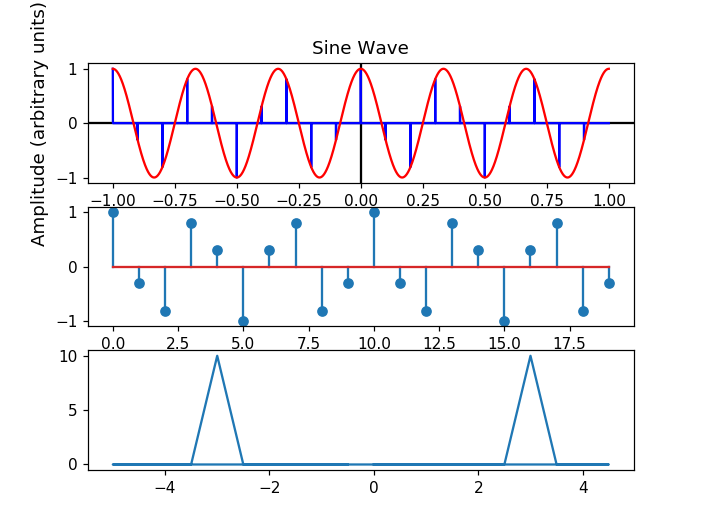

In [12]:
def get_fft_mag(signal):
    signal_length = signal.size
    return np.abs(np.fft.fft(signal, n=signal_length))

## Define plot parameters
sampling_interval = 0.0001 #seconds
multiplicative_factor = 1000

t = np.arange(-1, 1, sampling_interval)
omega = 2 * np.pi * 3
theta = np.pi / 2.0

T = sampling_interval * multiplicative_factor

sinusoid = sin(t, omega, theta)
delta_train = get_delta_train(multiplicative_factor, t.size)
sequence = get_sequence_from_signal(sinusoid, multiplicative_factor)

fftSignal = get_fft_mag(sequence)

## Create figure and axis objects so that the plot can be updated later.
fourier = plt.figure()
ax4 = fourier.add_subplot(311)
ax4.axhline(y=0, color = 'k')
ax4.axvline(x=0, color = 'k')
deltaPlotF, = ax4.plot(t, delta_train * sinusoid, 'b')
samplePlotF, = ax4.plot(t, sinusoid, 'r')

ax4.set_title(label='Sine Wave', fontsize='large')
ax4.set_ylabel('Amplitude (arbitrary units)', fontsize='large')
ax4.set_xlabel('Time (seconds)', fontsize='large')

ax5 = fourier.add_subplot(312)
ax5.axhline(y=0, color = 'k')
ax5.axvline(x=0, color = 'k')
ax5.stem(sequence)

ax5.set_title(label='The Sampled Sequence', fontsize='large')
ax5.set_ylabel('Amplitude (arbitrary units)', fontsize='large')
ax5.set_xlabel('Sample Number', fontsize='large')

ax6 = fourier.add_subplot(313)
ax6.plot(np.fft.fftfreq(sequence.size, T), fftSignal)

## Add a slider and update plot everytime it moves.
omegaSliderF = FloatSlider(min=0, max=40, step=0.005, continuous_update=True)
omegaSliderF.value = omega/(2*np.pi)
thetaSliderF = FloatSlider(min=0, max=2 * np.pi, step=0.005, continuous_update=True)
thetaSliderF.value = theta
intervalSliderF = FloatSlider(min=200, max=5000, step=5, continuous_update=True)
intervalSliderF.value = 1000

def update_fourier(omega, theta, multiplicative_factor):
    global t, sampling_interval
    
    sinusoid = sin(t, 2 * np.pi * omega, theta)
    delta_train = get_delta_train(multiplicative_factor, t.size)
    sequence = get_sequence_from_signal(sinusoid, multiplicative_factor)
    fftSignal = get_fft_mag(sequence)
    
    samplePlotF.set_ydata(sinusoid)
    deltaPlotF.set_ydata(delta_train * sinusoid)
    ax5.cla()
    ax5.stem(sequence)
    
    T = sampling_interval * multiplicative_factor
    
    ax6.cla()
    ax6.plot(np.fft.fftfreq(sequence.size, T), fftSignal)
    
    sample.canvas.draw_idle()
    
    print("Sampling Frequency: ", str(T), " seconds")
    print("Sampling Frequency: ", str(1./T), " Hz")
    print("Number of Samples: ", str(sequence.size))

def display_gui_fourier():
    '''
        This function handles showing the widgets on the notebook
    '''
    widgets.interact(update_fourier, omega=omegaSliderF, theta=thetaSliderF, multiplicative_factor=intervalSliderF)

plt.show()

In [13]:
display_gui_fourier()

interactive(children=(FloatSlider(value=3.0, description='omega', max=40.0, step=0.005), FloatSlider(value=1.5…

The bottom-most panel is the magnitude of the fourier transform of the sinusoid specified by omega and theta. It is generally referred to as the spectrum of the sequence. Play around with different frequencies for a fixed multiplicative factor, and check what happens when the sampling frequency is less than two times omega.

### 3. Filtering

In a lot of situations, it is advantageous to study different parts of the spectrum separately. For example, if we want to identify what instruments are playing in an audio file, we can study the spectrum of this signal to check for patterns. We would expect bass instruments to cover the lower frequencies, while the higher frequencies could be occupied by the wind instruments.

If we want to separate different parts of the spectrum, we perform the operation of filtering ie. multiplying the spectrum of a signal with a "window" which picks certain frequencies and suppresses the rest.

__Assignment 1 - Do the following:__
1. Create a signal which is a sum of two sinusoids, one with a low frequency and one with a high frequency. Use the sin() function defined above for this. Make sure that the signal is properly sampled. For fun, give them different amplitudes.
2. Create a gaussian signal, given by: $\frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\left(-\frac{(x - \mu)^2}{2 \sigma^2}\right)}$. Create a separate function in python called gauss, which takes time, mean and variance as parameters. Use the same strategy used in Part 1 to sample this function.
3. Obtain the fourier transform of the signal in Part 1 and plot it. Use the np.fft.fft() function for this. Also, plot the fourier transform of the gaussian function below it. Adjust the mean and variance of the original gaussian signal so as to "filter" out one of the frequencies (which one?) in the fourier domain.
4. Multiply the gaussian function with the fourier transform of your signal. Then, obtain the inverse fourier transform using the np.fft.ifft() function.
5. Compare this signal with the original signal. Is everything as you expected?

<IPython.core.display.Javascript object>


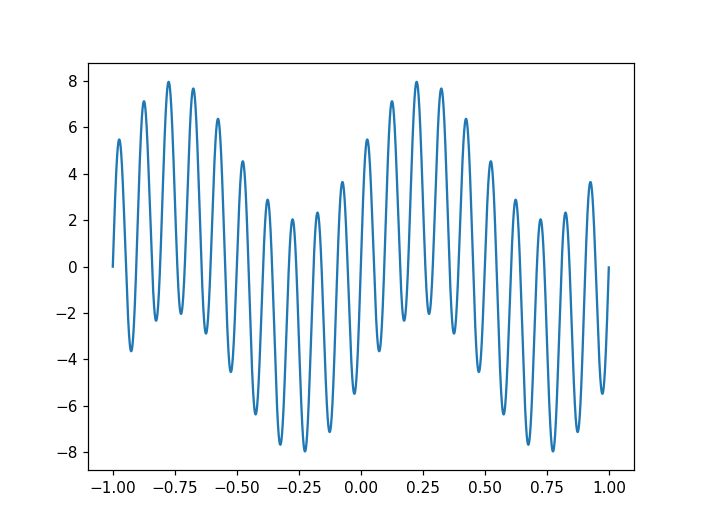

In [14]:
## Part 1: Sum of sinusoids
frequency1 = 2 * np.pi * 10
frequency2 = 2 * np.pi * 1
theta = 0

delta_train = np.arange(-1, 1, 0.0001)
signal = 5 * sin(t, frequency1, theta) + 3 * sin(t, frequency2, theta)

plt.figure()
plt.plot(t, signal)

<IPython.core.display.Javascript object>


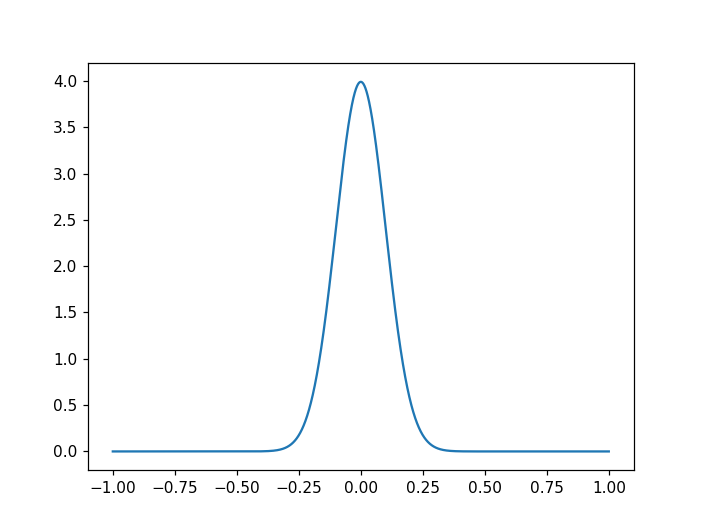

In [15]:
## Part 2: Gaussian signal
def gauss(t, mu, sigma2):
    return np.exp(-((t - mu)**2) / (2 * sigma2))/np.sqrt(2 * np.pi * sigma2)

window = gauss(t, 0, 0.01)

plt.figure()
plt.plot(t, window)
plt.show()

<IPython.core.display.Javascript object>


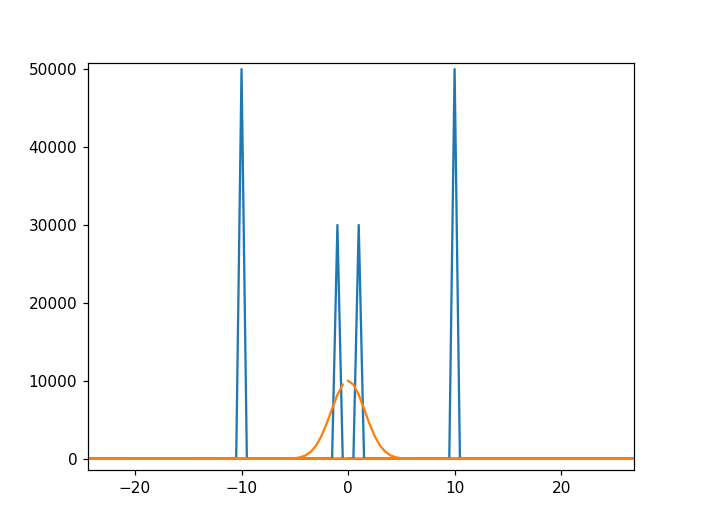

In [16]:
## Part 3: Spectra of our original signal and the gaussian window
fftSignal = np.fft.fft(signal)
fftWindow = np.fft.fft(window)

product = fftSignal * fftWindow

plt.figure()
#plt.plot(np.fft.fftfreq(fftSignal.size, 0.0001), np.abs(product))#np.abs(fftSignal)
plt.plot(np.fft.fftfreq(fftSignal.size, 0.0001), np.abs(fftSignal))#np.abs(fftSignal)
plt.plot(np.fft.fftfreq(fftSignal.size, 0.0001), np.abs(fftWindow))

filtered_signal = np.fft.ifft(product)

In [ ]:
## Part 4 - Filter!!

plt.figure()
plt.plot(t, filtered_signal)
plt.show()

### 4. Time Frequency Representations

Time-frequency representations allow us to look at how frequencies are evolving over time. For example, a typical song would begin with a musical instrument, and the singing starts much later. If we want to find out when the singing actually begins, we could use a time frequency representation to do this. The most commonly used time frequency representation is the spectrogram. The function implemented below takes a signal and a window function as input, and returns the Short Time Fourier Transform. Try to understand how each line works:

In [37]:
def get_stft(sig, win):
    N = sig.shape[0]
    Lh = win.shape[0]
    if Lh % 2 == 0:
        print("Window should be of odd length.")
        return None
    Lh = int((Lh - 1)/2)
    tfr = np.zeros((N, N), dtype='complex')
    for icol in range(N):
        tau = np.arange(-np.min([np.round(N/2.) - 1, Lh, icol]), np.min([np.round(N/2.) - 1, Lh, N - icol]), 1, dtype='int')
        indices = np.fmod((N + tau), N)
        tfr[indices, icol] = sig[icol + tau] * (np.conj(win[Lh + 1 + tau]))
        tfr[:, icol] = np.fft.fft(tfr[:, icol])
    
    return tfr

Test the above function out. Create a signal of 1024 samples with two sinusoid components, and plot its spectrogram. Remember: the spectrogram is the magnitude (absolute value, np.abs()) of the short time fourier transform. See what happens when you use the two different window functions defined below.

<IPython.core.display.Javascript object>


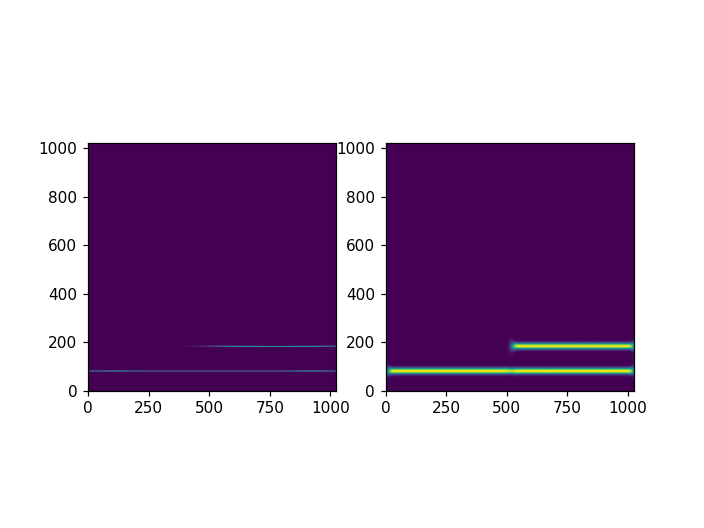

In [38]:
## Testing the stft - two component signals

## Implement the signal here. ##
#signal = np.ones((1024))
component1 = 5 * np.exp(1j * 2 * np.pi * 0.004 * 20 * np.arange(0, 1024))
signal = np.copy(component1)
signal[512:] += 5 * np.exp(1j * 2 * np.pi * 0.004 * 45 * np.arange(512, 1024))
################################

win1 = np.hamming(513)
win2 = np.hamming(65)

stft1 = get_stft(signal, win1)
stft2 = get_stft(signal, win2)

plt.figure()
plt.subplot(121)
plt.imshow(np.abs(stft1**2), origin="lower")
plt.subplot(122)
plt.imshow(np.abs(stft2**2), origin="lower")

### 5. Studying LFP Signals

Let's use what we have learned so far to analyze some LFP signals. We are interested in studying the evolution of frequency content as the trial progresses (refer to the slides for a description of the data). Using the STFT to do this seems like a good idea.

Do the following:
1. Plot a single trial of the 100% contrast data. Mark the beginning of the trial using the lfpInfo array. Can you make out when the trial starts visually?
2. Plot a single trial spectrogram. Is there any obvious pattern in the evolution of frequencies? Try plotting different trials and the corresponding spectrograms.
3. Plot the spectrum of a single trial. Then, plot the average spectrum for the 0% contrast condition and the 100% contrast condition. What do you observe and why?

In [ ]:
## Load data into a 
elec = sio.loadmat('elec83c100.mat')
trials = elec['analogData']

In [ ]:
trial_1 = trials[1, :]
plt.figure()
plt.plot(trial_1)
plt.show()